In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def get_trial_df(trial_name, minibatch_cols, epoch_cols):
    tr = pd.read_pickle("./output/{}/training_record.pkl".format(trial_name))
    num_minibatch = tr["Minibatch"].max()
    minibatch_df = (tr[tr["Minibatch"]!=-1])
    minibatch_df["Epoch"] = minibatch_df["Epoch"] + minibatch_df["Minibatch"]*(1/num_minibatch)
    minibatch_df = minibatch_df[["Epoch"]+minibatch_cols]

    epoch_df = (tr[tr["Minibatch"]==-1])
    epoch_df = epoch_df[["Epoch"]+epoch_cols]
    return minibatch_df, epoch_df

In [53]:
def plot_trial(minibatch_df, epoch_df, y1_criteria, title):
    x1 = minibatch_df[['Epoch']]
    y1 = minibatch_df[[y1_criteria]]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x1, y1)
    ax1.set_ylabel(y1_criteria, color='b')
    ax1.set_xlabel("Epoch")
    ax1.set_title(title)
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    x2 = epoch_df[['Epoch']]
    y2 = epoch_df[['IoU']]
    ax2 = ax1.twinx()
    ax2.plot(x2, y2, 'r-')
    ax2.set_ylabel('IoU', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

# DA CORAL

In [57]:
CORAL_trial_names = {
    100: "2020_03_19--18_56_27_OOWL_DA_CORAL_lam_100_TRAIN",
    10: "2020_03_19--18_54_21_OOWL_DA_CORAL_lam_10_TRAIN",
    1: "2020_03_19--18_45_14_OOWL_DA_CORAL_lam_1_TRAIN",
    0: "2020_03_19--15_40_22_OOWL_DA_CORAL_lam_0_TRAIN",
    0.1: "2020_03_19--04_44_31_OOWL_DA_CORAL_lam_0.1_TRAIN",
    0.01: "2020_03_19--04_44_23_OOWL_DA_CORAL_lam_0.01_TRAIN"
}

/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

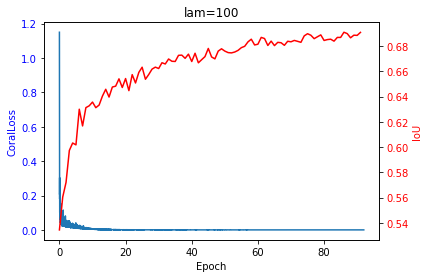

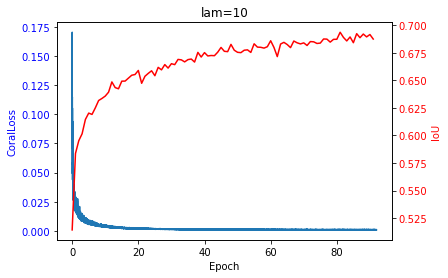

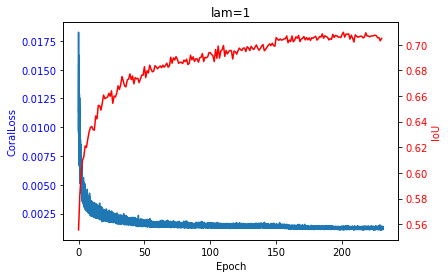

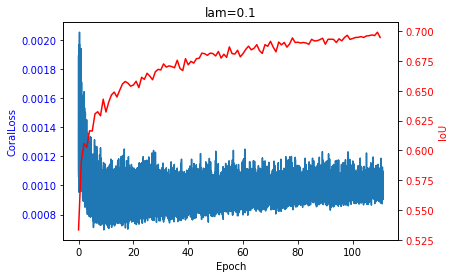

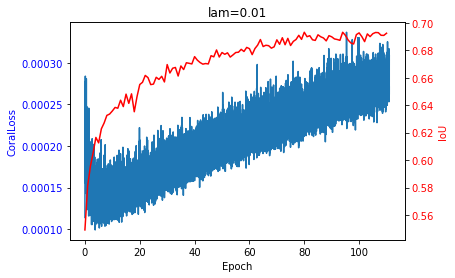

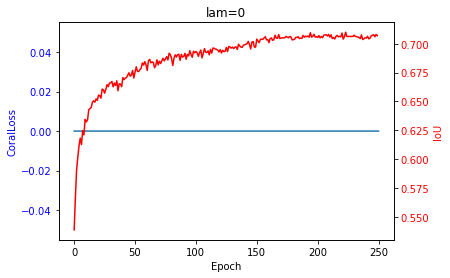

In [60]:

for lam in [100,10,1,0.1,0.01,0]:
    trial_name = CORAL_trial_names[lam]
    minibatch_df, epoch_df = get_trial_df(trial_name, ["EDLoss", "RLoss", "CoralLoss"], ["IoU"])
    plot_trial(minibatch_df, epoch_df, "CoralLoss", "lam={}".format(lam))

# DA DANN

In [47]:
DANN_trial_names = {
    1: "2020_03_19--21_49_02_OOWL_DA_DANN_lam_1_TRAIN",
    0.5: "2020_03_19--21_48_03_OOWL_DA_DANN_lam_0.5_TRAIN",
    0.1: "2020_03_19--21_46_31_OOWL_DA_DANN_lam_0.1_TRAIN",
}

/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

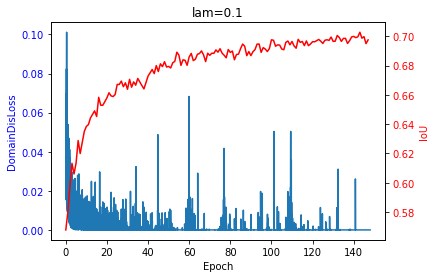

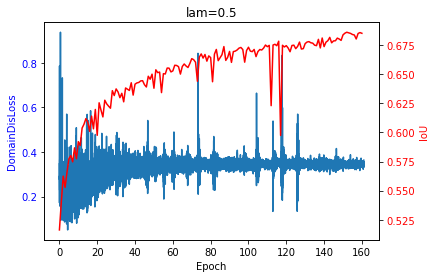

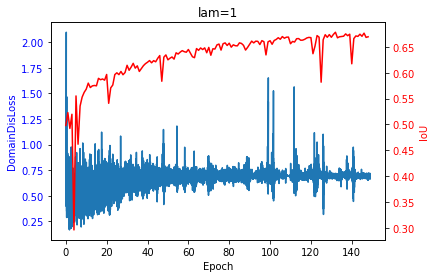

In [61]:
for lam in [0.1,0.5,1]:
    trial_name = DANN_trial_names[lam]
    minibatch_df, epoch_df = get_trial_df(trial_name, ["EDLoss", "RLoss", "DomainDisLoss"], ["IoU"])
    plot_trial(minibatch_df, epoch_df, "DomainDisLoss", "lam={}".format(lam))

# VoxelClassify

/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


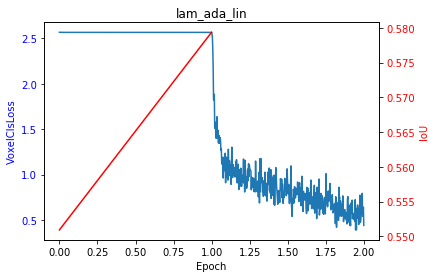

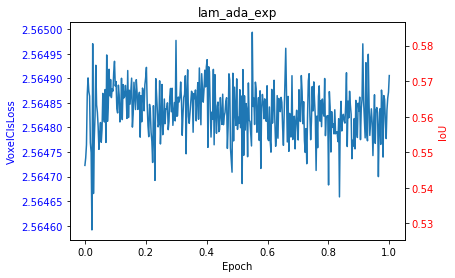

In [62]:
voxelcls_trials = [["2020_03_20--18_52_32_OOWLVoxelCls_VoxLamlinear_DANNlam0_TRAIN", "lam_ada_lin"],
                   ["2020_03_20--18_51_09_OOWLVoxelCls_VoxLamDANN_DANNlam0_TRAIN", "lam_ada_exp"],
                  ]
for trial_name, trial_title in voxelcls_trials:
    minibatch_df, epoch_df = get_trial_df(trial_name, ["EDLoss", "RLoss", "DomainDisLoss", "VoxelClsLoss", "VoxelClsLam"], ["IoU"])
    plot_trial(minibatch_df, epoch_df, "VoxelClsLoss", trial_title)

/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

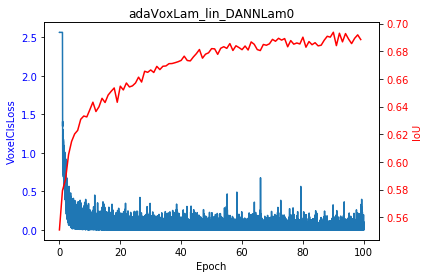

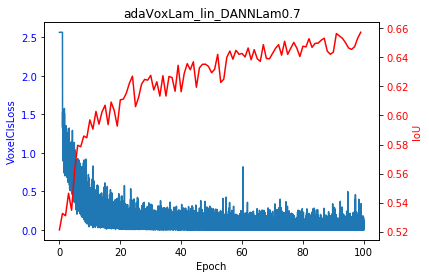

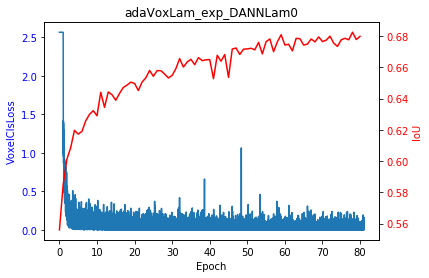

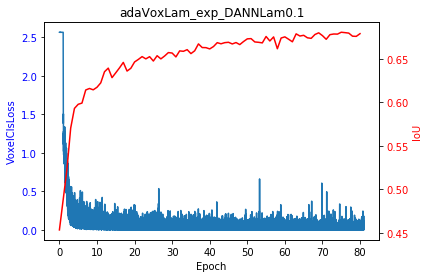

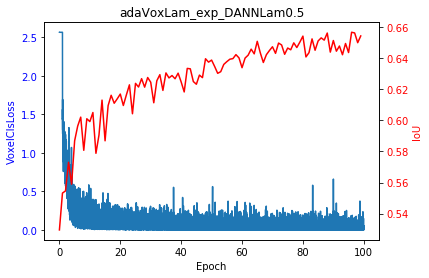

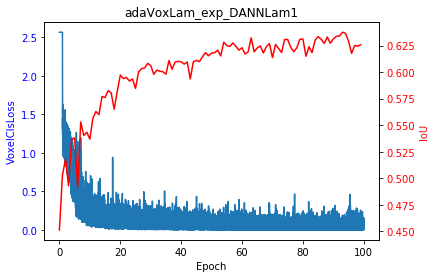

In [68]:

voxelcls_trials = [["2020_03_20--18_52_32_OOWLVoxelCls_VoxLamlinear_DANNlam0_TRAIN", "adaVoxLam_lin_DANNLam0"],
                   ["2020_03_20--18_56_47_OOWLVoxelCls_VoxLamlinear_DANNlam0.7_TRAIN", "adaVoxLam_lin_DANNLam0.7"],
                   ["2020_03_20--18_51_09_OOWLVoxelCls_VoxLamDANN_DANNlam0_TRAIN", "adaVoxLam_exp_DANNLam0"],
                   ["2020_03_20--18_49_57_OOWLVoxelCls_VoxLamDANN_DANNlam0.1_TRAIN", "adaVoxLam_exp_DANNLam0.1"],
                   ["2020_03_20--18_46_44_OOWLVoxelCls_VoxLamDANN_DANNlam0.5_TRAIN", "adaVoxLam_exp_DANNLam0.5"],
                   ["2020_03_20--18_47_03_OOWLVoxelCls_VoxLamDANN_DANNlam1_TRAIN", "adaVoxLam_exp_DANNLam1"],
                  ]

for trial_name, trial_title in voxelcls_trials:
    minibatch_df, epoch_df = get_trial_df(trial_name, ["EDLoss", "RLoss", "DomainDisLoss", "VoxelClsLoss", "VoxelClsLam"], ["IoU"])
    plot_trial(minibatch_df, epoch_df, "VoxelClsLoss", trial_title)